In [391]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import utils
from sklearn import model_selection
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from matplotlib.pylab import rcParams   
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [332]:
df_CO2_Emission = pd.read_csv('CO2 Emissions_Canada.csv')
df_CO2_Emission

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


DATA Prepation

In [333]:
df_CO2_Emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [334]:
df_CO2_Emission.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [335]:
df_CO2_Emission.drop_duplicates(inplace=True)

In [336]:
df_CO2_Emission.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [337]:
df_CO2_Emission_wait = pd.DataFrame()
df_CO2_Emission_check = pd.DataFrame()
columns_cont = []
for i in df_CO2_Emission.columns:
    temp = i
    if df_CO2_Emission[i].dtypes == 'object' or i == 'CO2 Emissions(g/km)':
        df_CO2_Emission_wait[temp] = df_CO2_Emission[i]
    else:
        columns_cont.append(i)
        df_CO2_Emission_check[temp] = df_CO2_Emission[i]


In [338]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27
...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30
7381,2.0,4,11.2,8.3,9.9,29
7382,2.0,4,11.7,8.6,10.3,27
7383,2.0,4,11.2,8.3,9.9,29


In [339]:
df_CO2_Emission_wait

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,AS5,Z,196
1,ACURA,ILX,COMPACT,M6,Z,221
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244
...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232


In [340]:
df_CO2_Emission_wait.reset_index(inplace=True)
df_CO2_Emission_wait.drop(columns='index',inplace=True)
df_CO2_Emission_wait

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,AS5,Z,196
1,ACURA,ILX,COMPACT,M6,Z,221
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244
...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232


In [341]:
scale = preprocessing.StandardScaler()
df_CO2_Emission_check = pd.DataFrame(scale.fit_transform(df_CO2_Emission_check),columns = columns_cont)

In [342]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851086,-0.876934,-0.762844,-1.040321,-0.854490,0.771454
1,-0.558066,-0.876934,-0.396934,-0.601475,-0.481184,0.219329
2,-1.217362,-0.876934,-1.860575,-1.435283,-1.736851,2.841921
3,0.247740,0.206429,0.025270,0.012910,0.027870,-0.332795
4,0.247740,0.206429,-0.143611,-0.162629,-0.141815,-0.056733
...,...,...,...,...,...,...
6277,-0.851086,-0.876934,-0.537668,-0.601475,-0.549058,0.357361
6278,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329
6279,-0.851086,-0.876934,-0.256199,-0.206513,-0.243625,-0.056733
6280,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329


In [343]:
df_CO2_Emission_wait

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,AS5,Z,196
1,ACURA,ILX,COMPACT,M6,Z,221
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244
...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232


{'whiskers': [<matplotlib.lines.Line2D at 0x282b796f370>,
 'caps': [<matplotlib.lines.Line2D at 0x282b796d9c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x282b796d2a0>,
 'medians': [<matplotlib.lines.Line2D at 0x282b796d5a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x282b796e650>,
 'means': []}

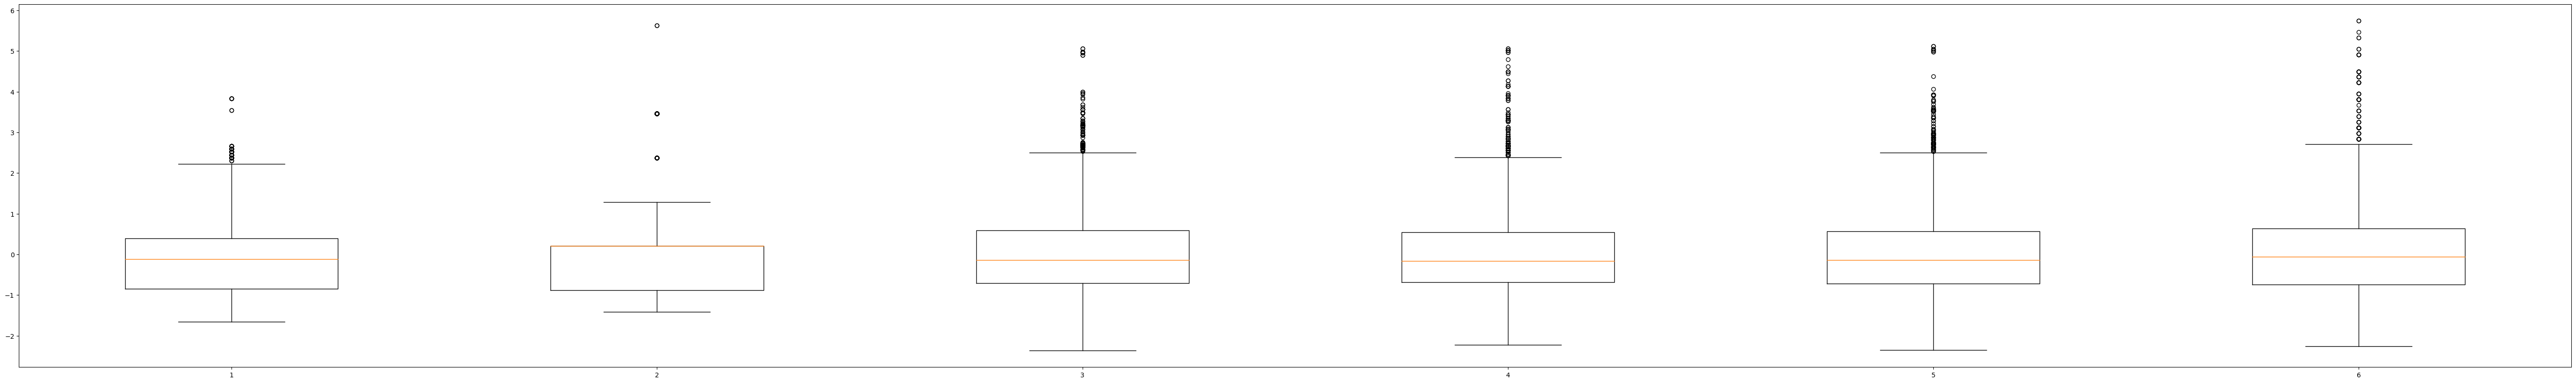

In [344]:
fig,ax = plt.subplots()
ax.boxplot(df_CO2_Emission_check)

In [345]:
def remove_outlier(df_in,col_name_x):
    q1_x = df_in[col_name_x].quantile(0.25)
    q3_x = df_in[col_name_x].quantile(0.75)
    iqr_x = q3_x-q1_x #Interquartile range
    fence_low_x  = q1_x-1.5*iqr_x
    fence_high_x = q3_x+1.5*iqr_x
    df_out = df_in.loc[((df_in[col_name_x] > fence_low_x) & (df_in[col_name_x] < fence_high_x))]
    return df_out


In [346]:
for i in df_CO2_Emission_check.columns:
    df_CO2_Emission_check = remove_outlier(df_CO2_Emission_check,i)

{'whiskers': [<matplotlib.lines.Line2D at 0x282b7e3da50>,
 'caps': [<matplotlib.lines.Line2D at 0x282b7e3df90>,
 'boxes': [<matplotlib.lines.Line2D at 0x282b7e3d7b0>,
 'medians': [<matplotlib.lines.Line2D at 0x282b7e3e4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x282b7e3e770>,
 'means': []}

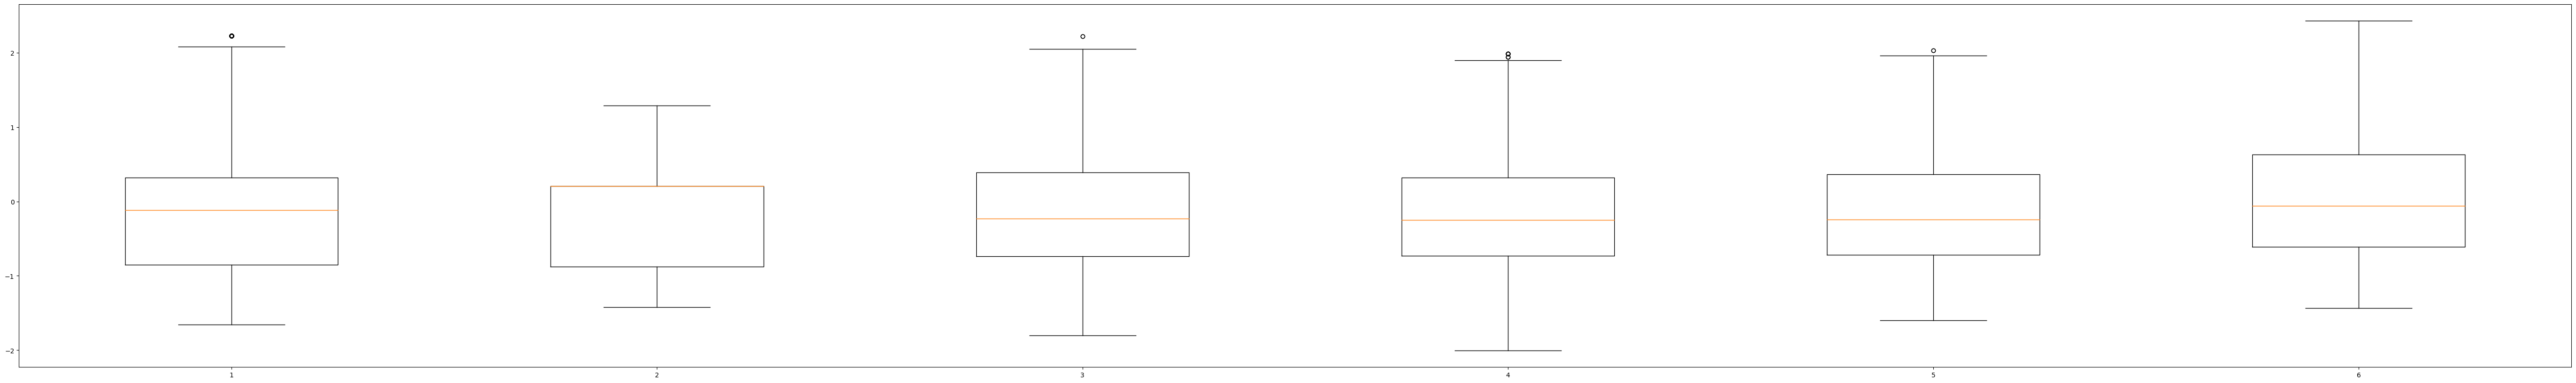

In [347]:
fig,ax = plt.subplots()
ax.boxplot(df_CO2_Emission_check)

In [348]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851086,-0.876934,-0.762844,-1.040321,-0.854490,0.771454
1,-0.558066,-0.876934,-0.396934,-0.601475,-0.481184,0.219329
3,0.247740,0.206429,0.025270,0.012910,0.027870,-0.332795
4,0.247740,0.206429,-0.143611,-0.162629,-0.141815,-0.056733
5,0.247740,0.206429,-0.199905,-0.601475,-0.345436,0.081298
...,...,...,...,...,...,...
6277,-0.851086,-0.876934,-0.537668,-0.601475,-0.549058,0.357361
6278,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329
6279,-0.851086,-0.876934,-0.256199,-0.206513,-0.243625,-0.056733
6280,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329


In [349]:
df_CO2_Emission_ver_2 = pd.concat([df_CO2_Emission_wait,df_CO2_Emission_check], axis=1)

In [350]:
df_CO2_Emission_ver_2

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km),Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,COMPACT,AS5,Z,196,-0.851086,-0.876934,-0.762844,-1.040321,-0.854490,0.771454
1,ACURA,ILX,COMPACT,M6,Z,221,-0.558066,-0.876934,-0.396934,-0.601475,-0.481184,0.219329
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136,NaN,NaN,NaN,NaN,NaN,NaN
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255,0.247740,0.206429,0.025270,0.012910,0.027870,-0.332795
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244,0.247740,0.206429,-0.143611,-0.162629,-0.141815,-0.056733
...,...,...,...,...,...,...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219,-0.851086,-0.876934,-0.537668,-0.601475,-0.549058,0.357361
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240,-0.851086,-0.876934,-0.256199,-0.206513,-0.243625,-0.056733
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329


In [351]:
df_CO2_Emission_ver_2.dropna(inplace=True)

In [352]:
df_CO2_Emission_ver_2.reset_index(inplace=True)
df_CO2_Emission_ver_2.drop(columns='index',inplace=True)

In [353]:
df_CO2_Emission_ver_2

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km),Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,COMPACT,AS5,Z,196,-0.851086,-0.876934,-0.762844,-1.040321,-0.854490,0.771454
1,ACURA,ILX,COMPACT,M6,Z,221,-0.558066,-0.876934,-0.396934,-0.601475,-0.481184,0.219329
2,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255,0.247740,0.206429,0.025270,0.012910,0.027870,-0.332795
3,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244,0.247740,0.206429,-0.143611,-0.162629,-0.141815,-0.056733
4,ACURA,RLX,MID-SIZE,AS6,Z,230,0.247740,0.206429,-0.199905,-0.601475,-0.345436,0.081298
...,...,...,...,...,...,...,...,...,...,...,...,...
5668,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219,-0.851086,-0.876934,-0.537668,-0.601475,-0.549058,0.357361
5669,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329
5670,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240,-0.851086,-0.876934,-0.256199,-0.206513,-0.243625,-0.056733
5671,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329


In [354]:
df_CO2_Emission_ver_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5673 entries, 0 to 5672
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5673 non-null   object 
 1   Model                             5673 non-null   object 
 2   Vehicle Class                     5673 non-null   object 
 3   Transmission                      5673 non-null   object 
 4   Fuel Type                         5673 non-null   object 
 5   CO2 Emissions(g/km)               5673 non-null   int64  
 6   Engine Size(L)                    5673 non-null   float64
 7   Cylinders                         5673 non-null   float64
 8   Fuel Consumption City (L/100 km)  5673 non-null   float64
 9   Fuel Consumption Hwy (L/100 km)   5673 non-null   float64
 10  Fuel Consumption Comb (L/100 km)  5673 non-null   float64
 11  Fuel Consumption Comb (mpg)       5673 non-null   float64
dtypes: flo

In [355]:
Y = df_CO2_Emission_ver_2['CO2 Emissions(g/km)']
df_CO2_Emission_ver_2.drop(columns='CO2 Emissions(g/km)',inplace=True)
Y

0       196
1       221
2       255
3       244
4       230
       ... 
5668    219
5669    232
5670    240
5671    232
5672    248
Name: CO2 Emissions(g/km), Length: 5673, dtype: int64

In [356]:
df_CO2_Emission_cont = pd.DataFrame()
df_CO2_Emission_cate = pd.DataFrame()
columns_cont = []
for i in df_CO2_Emission_ver_2.columns:
    temp = i
    if df_CO2_Emission_ver_2[i].dtypes == 'object' :
        df_CO2_Emission_cate[temp] = df_CO2_Emission_ver_2[i]
    else:
        columns_cont.append(i)
        df_CO2_Emission_cont[temp] = df_CO2_Emission_ver_2[i]

In [357]:
df_CO2_Emission_cont

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851086,-0.876934,-0.762844,-1.040321,-0.854490,0.771454
1,-0.558066,-0.876934,-0.396934,-0.601475,-0.481184,0.219329
2,0.247740,0.206429,0.025270,0.012910,0.027870,-0.332795
3,0.247740,0.206429,-0.143611,-0.162629,-0.141815,-0.056733
4,0.247740,0.206429,-0.199905,-0.601475,-0.345436,0.081298
...,...,...,...,...,...,...
5668,-0.851086,-0.876934,-0.537668,-0.601475,-0.549058,0.357361
5669,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329
5670,-0.851086,-0.876934,-0.256199,-0.206513,-0.243625,-0.056733
5671,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329


In [358]:
df_CO2_Emission_cate

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
3,ACURA,RDX AWD,SUV - SMALL,AS6,Z
4,ACURA,RLX,MID-SIZE,AS6,Z
...,...,...,...,...,...
5668,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
5669,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
5670,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
5671,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


In [359]:
Y

0       196
1       221
2       255
3       244
4       230
       ... 
5668    219
5669    232
5670    240
5671    232
5672    248
Name: CO2 Emissions(g/km), Length: 5673, dtype: int64

In [360]:
data = df_CO2_Emission_cont.corr()
data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
Engine Size(L),1.000000,0.934945,0.824892,0.755545,0.813791,-0.779744
Cylinders,0.934945,1.000000,0.805890,0.724600,0.790274,-0.759424
Fuel Consumption City (L/100 km),0.824892,0.805890,1.000000,0.931175,0.991603,-0.963887
Fuel Consumption Hwy (L/100 km),0.755545,0.724600,0.931175,1.000000,0.969974,-0.940115
Fuel Consumption Comb (L/100 km),0.813791,0.790274,0.991603,0.969974,1.000000,-0.971140
Fuel Consumption Comb (mpg),-0.779744,-0.759424,-0.963887,-0.940115,-0.971140,1.000000


<AxesSubplot: >

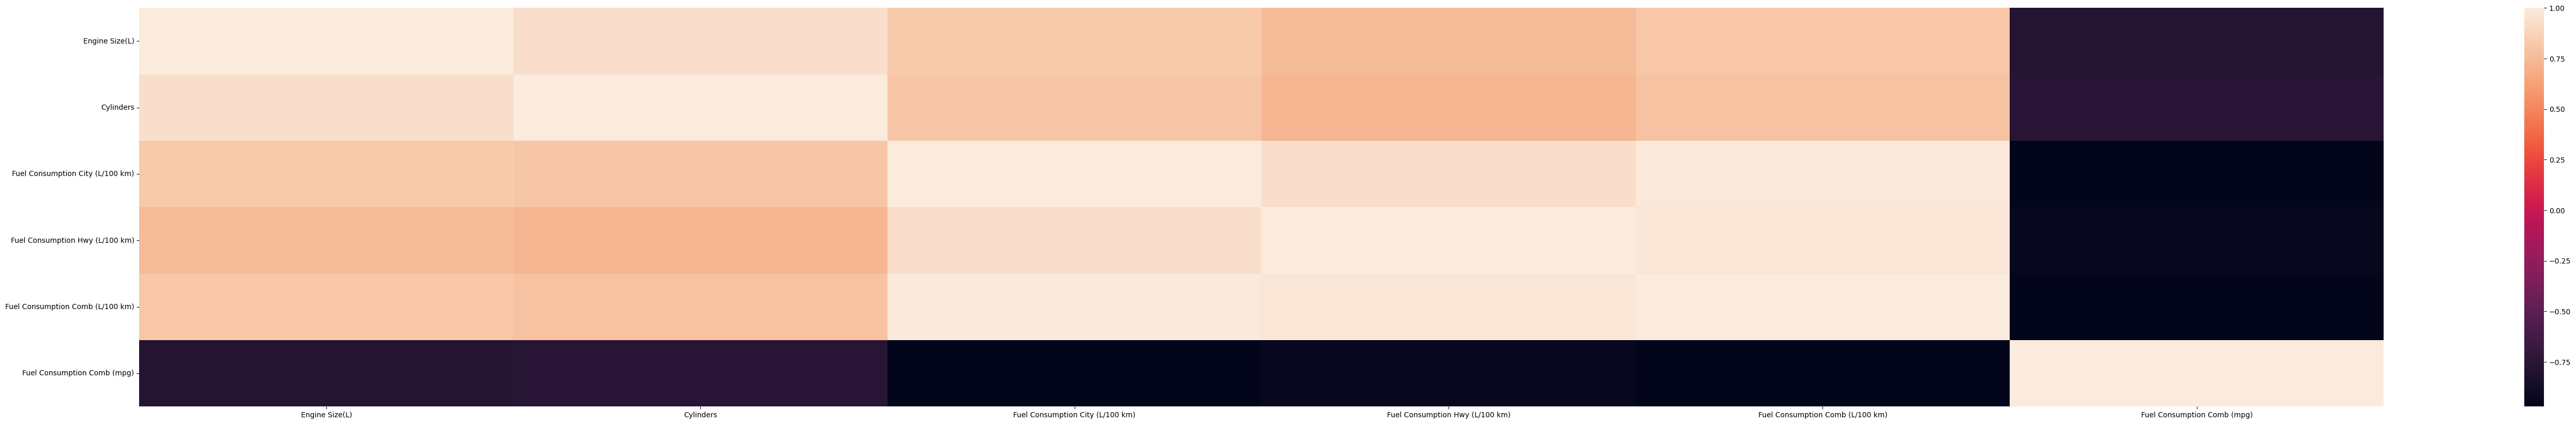

In [361]:
sns.heatmap(data)

In [362]:
lower = pd.DataFrame(np.tril(data, -1),columns = data.columns)
lower

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.934945,0.000000,0.000000,0.000000,0.00000,0.0
2,0.824892,0.805890,0.000000,0.000000,0.00000,0.0
3,0.755545,0.724600,0.931175,0.000000,0.00000,0.0
4,0.813791,0.790274,0.991603,0.969974,0.00000,0.0
5,-0.779744,-0.759424,-0.963887,-0.940115,-0.97114,0.0


In [363]:
to_drop = [column for column in lower if any(lower[column] > 0.95)]
df_CO2_Emission_cont.drop(to_drop, inplace=True, axis=1)
df_CO2_Emission_cont

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851086,-0.876934,-0.854490,0.771454
1,-0.558066,-0.876934,-0.481184,0.219329
2,0.247740,0.206429,0.027870,-0.332795
3,0.247740,0.206429,-0.141815,-0.056733
4,0.247740,0.206429,-0.345436,0.081298
...,...,...,...,...
5668,-0.851086,-0.876934,-0.549058,0.357361
5669,-0.851086,-0.876934,-0.379373,0.219329
5670,-0.851086,-0.876934,-0.243625,-0.056733
5671,-0.851086,-0.876934,-0.379373,0.219329


<AxesSubplot: >

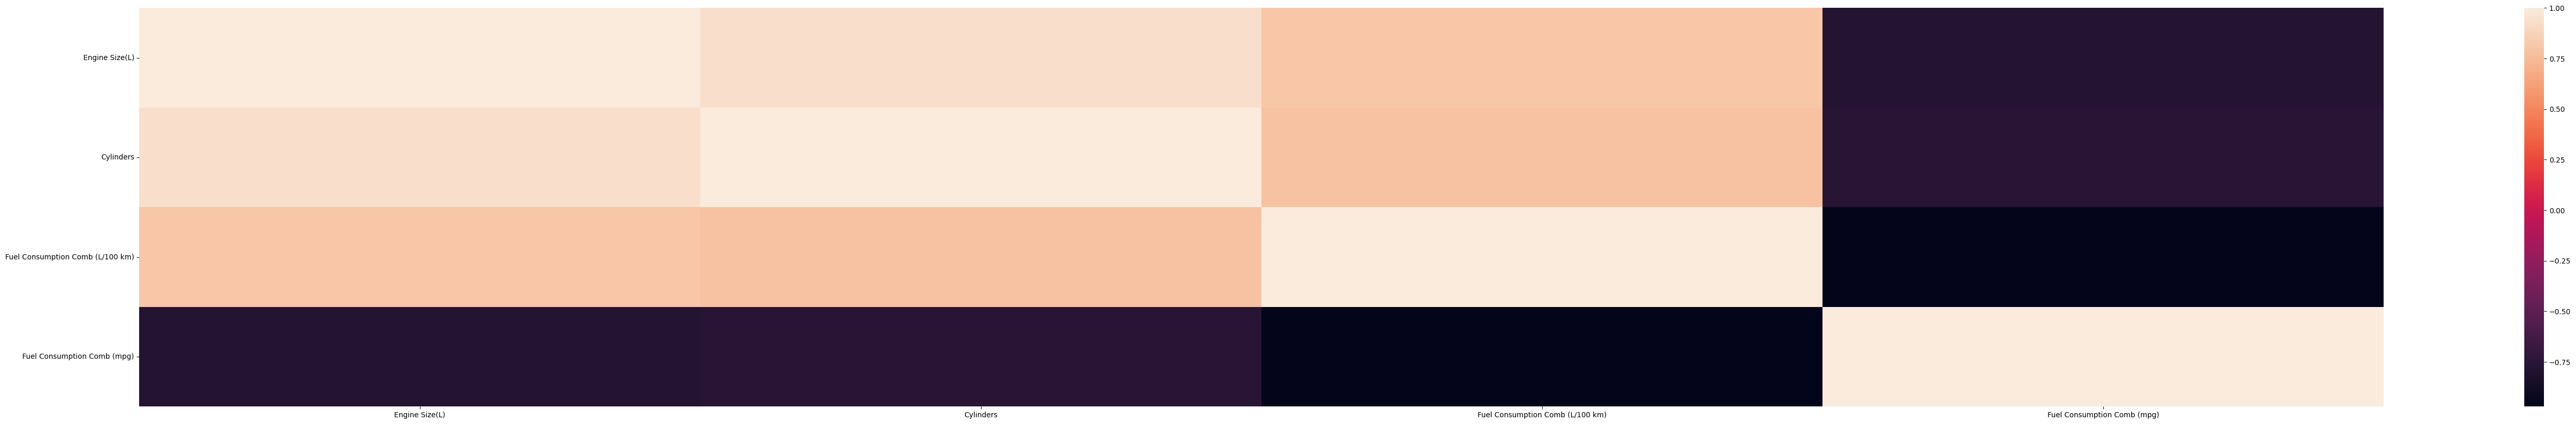

In [364]:
sns.heatmap(df_CO2_Emission_cont.corr())

In [365]:
df_CO2_Emission_cate

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
3,ACURA,RDX AWD,SUV - SMALL,AS6,Z
4,ACURA,RLX,MID-SIZE,AS6,Z
...,...,...,...,...,...
5668,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
5669,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
5670,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
5671,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


In [366]:
df_CO2_Emission_cate_dum = pd.get_dummies(df_CO2_Emission_cate,columns=['Make','Model','Vehicle Class','Transmission','Fuel Type'])

In [367]:
df_CO2_Emission_cate_dum

,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [368]:
X = pd.DataFrame()
X = df_CO2_Emission_cont.join(df_CO2_Emission_cate_dum)

In [369]:
X

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,-0.851086,-0.876934,-0.854490,0.771454,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.558066,-0.876934,-0.481184,0.219329,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.247740,0.206429,0.027870,-0.332795,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.247740,0.206429,-0.141815,-0.056733,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.247740,0.206429,-0.345436,0.081298,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,-0.851086,-0.876934,-0.549058,0.357361,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5669,-0.851086,-0.876934,-0.379373,0.219329,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5670,-0.851086,-0.876934,-0.243625,-0.056733,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5671,-0.851086,-0.876934,-0.379373,0.219329,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [370]:
Y

0       196
1       221
2       255
3       244
4       230
       ... 
5668    219
5669    232
5670    240
5671    232
5672    248
Name: CO2 Emissions(g/km), Length: 5673, dtype: int64

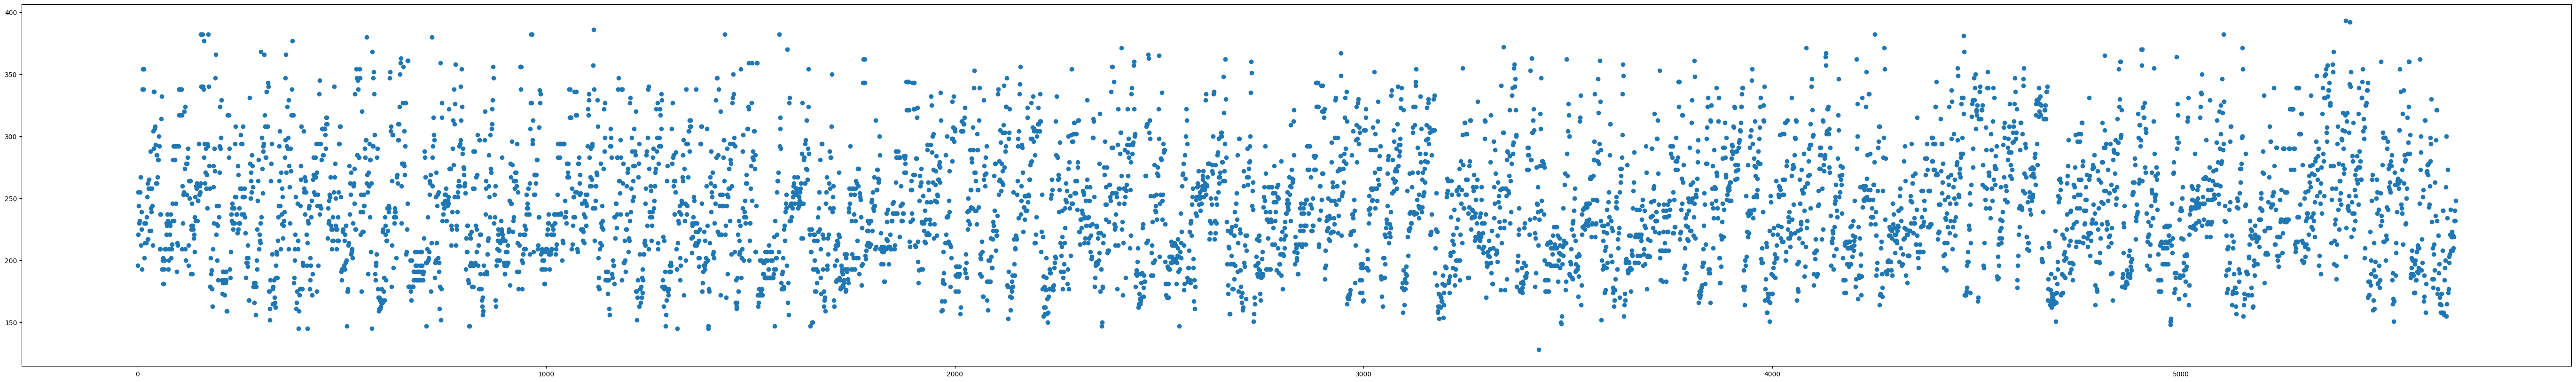

In [371]:
plt.scatter(Y.index, Y)
plt.show()

In [372]:
rating_pctile = np.percentile( Y, [25, 75])
Y_list = []
many_Co2 = 0
moderate_Co2 = 0
little_Co2 = 0
for i in Y:
    if (i < rating_pctile[0]): 
        CO2_grade = 1
        Y_list.append(CO2_grade)
        many_Co2=many_Co2+1
    if (rating_pctile[0] <= i < rating_pctile[1]): 
        CO2_grade = 2
        Y_list.append(CO2_grade)
        moderate_Co2=moderate_Co2+1 
    if (i >= rating_pctile[1]): 
        CO2_grade = 3
        Y_list.append(CO2_grade)
        little_Co2=little_Co2+1

figdata = pd.DataFrame([[1,many_Co2],[2,moderate_Co2],[3,little_Co2]],columns = ["CO2_LEVEL","NSamples"])

In [373]:
fig = px.bar( figdata, x = 'CO2_LEVEL', y = 'NSamples', color='NSamples')
fig.show()

In [374]:
Y_0 = pd.DataFrame()
Y_0['CO2_LEVEL'] = Y_list
Y = Y_0['CO2_LEVEL']

In [375]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [376]:
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 25, 35]
KNNScore_list = []
for i in k:
    modelKNN = KNeighborsClassifier(n_neighbors=i, p=2)
    modelKNN.fit(X_train,Y_train)
    y_pred= modelKNN.predict(X_test)
    KNNScore = accuracy_score(Y_test, y_pred)
    KNNScore_list.append(KNNScore)

In [377]:
KNNScore = pd.DataFrame()
KNNScore['k'] = k
KNNScore['KNN_Score'] = KNNScore_list

In [378]:
fig = px.bar( KNNScore, x = 'k', y = 'KNN_Score', color='KNN_Score')
fig.show()

In [379]:
modelKNN = KNeighborsClassifier(n_neighbors=11, p=2)
modelKNN.fit(X_train,Y_train)
y_pred= modelKNN.predict(X_test)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report: ')
print(classification_report(Y_test, y_pred))

Confusion Matrix: 
[[384  48   0]
 [ 25 809  32]
 [  0  32 372]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.94      0.89      0.91       432
           2       0.91      0.93      0.92       866
           3       0.92      0.92      0.92       404

    accuracy                           0.92      1702
   macro avg       0.92      0.91      0.92      1702
weighted avg       0.92      0.92      0.92      1702



In [380]:
ASM_function = ['entropy', 'gini'] 
maxD = [4, 5, 6, None] # try at least 2 values
for i in ASM_function:
    for j in maxD:
        ModelDT = DecisionTreeClassifier(criterion=i, splitter='best',max_depth = j )
        ModelDT.fit(X_train,Y_train)
        y_pred= ModelDT.predict(X_test)
        DTScore = accuracy_score(Y_test, y_pred)
        print('criterion = ',i,'max_depth = ',j)
        print(DTScore)

criterion =  entropy max_depth =  4
0.9700352526439483
criterion =  entropy max_depth =  5
0.9712103407755581
criterion =  entropy max_depth =  6
0.9682726204465335
criterion =  entropy max_depth =  None
0.9706227967097533
criterion =  gini max_depth =  4
0.9682726204465335
criterion =  gini max_depth =  5
0.9723854289071681
criterion =  gini max_depth =  6
0.9700352526439483
criterion =  gini max_depth =  None
0.9712103407755581


In [381]:
a = "entropy"
b = 6
ModelDT = DecisionTreeClassifier(criterion = a, splitter='best',max_depth = b )
ModelDT.fit(X_train,Y_train)
# Model Testing
Y_pred = ModelDT.predict(X_test)
DTScore = accuracy_score(Y_test, Y_pred)
print("criterion = ",a,"max_depth =",b)
print(DTScore)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, Y_pred))
print('Classification Report: ')
print(classification_report(Y_test, Y_pred))

criterion =  entropy max_depth = 6
0.9670975323149236
Confusion Matrix: 
[[413  19   0]
 [ 10 843  13]
 [  0  14 390]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       432
           2       0.96      0.97      0.97       866
           3       0.97      0.97      0.97       404

    accuracy                           0.97      1702
   macro avg       0.97      0.96      0.97      1702
weighted avg       0.97      0.97      0.97      1702



[1 2 3]


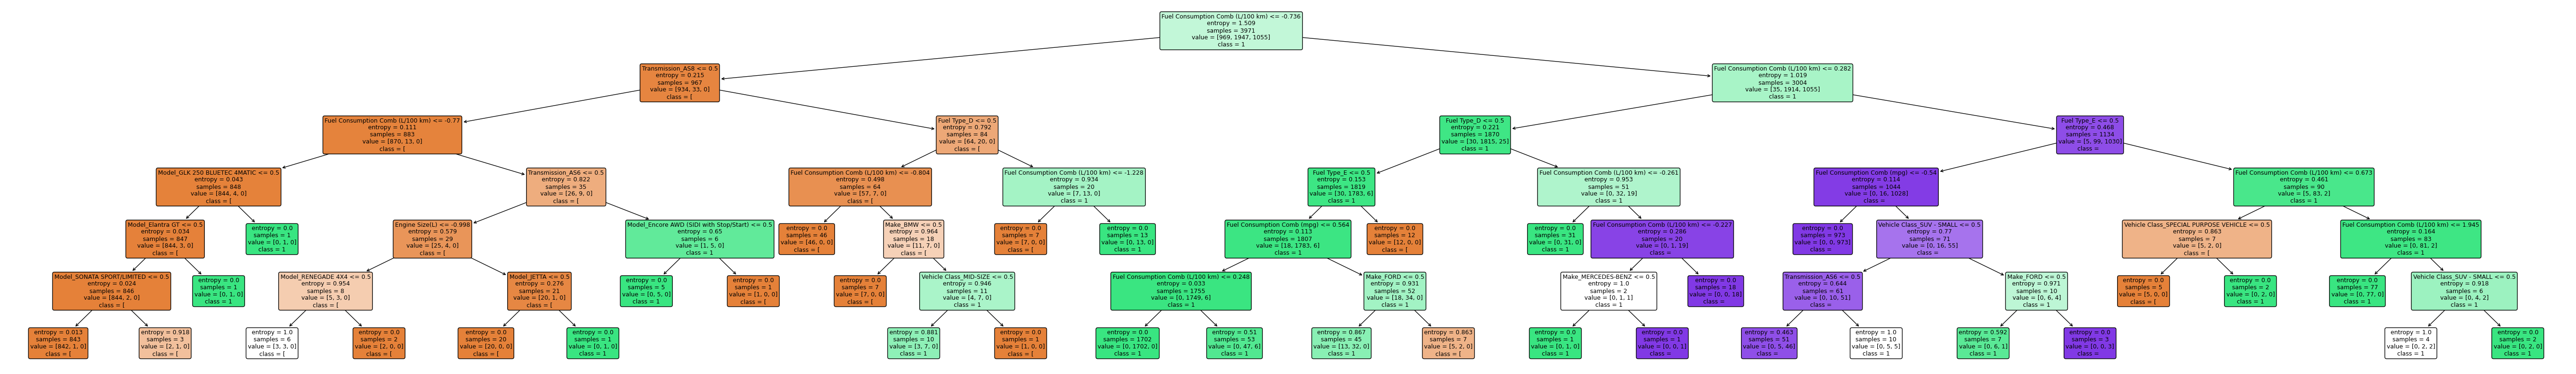

In [382]:
# Visualize Decision Tree
feature_names = X_train.columns
mpl.rcParams['figure.figsize'] = 70,10
Labels = str(np.unique(Y_train))
print(Labels)
tree.plot_tree( ModelDT,feature_names = feature_names,class_names = Labels,rounded = True,filled = True, fontsize=9)
plt.show()

In [383]:
ASM_function = ['entropy', 'gini']
nEstimator = 50
nJob = 2
rState = 10

In [384]:
RandomF = RandomForestClassifier(criterion=ASM_function[1],n_estimators=nEstimator, n_jobs=nJob, random_state=rState)
RandomF.fit(X_train,Y_train)
y_pred= RandomF.predict(X_test)
RFScore = accuracy_score(Y_test, y_pred)
print(RFScore)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report: ')
print(classification_report(Y_test, y_pred))

0.9688601645123385
Confusion Matrix: 
[[422  10   0]
 [ 12 835  19]
 [  0  12 392]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       432
           2       0.97      0.96      0.97       866
           3       0.95      0.97      0.96       404

    accuracy                           0.97      1702
   macro avg       0.97      0.97      0.97      1702
weighted avg       0.97      0.97      0.97      1702



In [392]:
# Model Traing Parameter
# Create SVC model
c_val = 100 
gmm =0.1
d = 2
# Model initialize
svc_lin = SVC(kernel='linear', C=c_val)
svc_rbf = SVC(kernel='rbf', C=c_val, gamma=gmm)
svc_poly = SVC(kernel='poly', C=c_val, degree = d)

In [393]:
svc_rbf = svc_rbf.fit(X_train, Y_train)
svc_poly = svc_poly.fit(X_train, Y_train)

In [394]:
svc_rbf_pred = svc_rbf.predict(X_test)
svc_poly_pred = svc_poly.predict(X_test)

In [395]:
# Print Confusion Matrix and Classification Report for best k
print('Confusion Matrix of SVC_RBF: ')
print(confusion_matrix(Y_test, svc_rbf_pred))
print('Classification Report of SVC_RBF: ')
print(classification_report(Y_test, svc_rbf_pred))

Confusion Matrix of SVC_RBF: 
[[416  16   0]
 [ 13 836  17]
 [  0  10 394]]
Classification Report of SVC_RBF: 
              precision    recall  f1-score   support

           1       0.97      0.96      0.97       432
           2       0.97      0.97      0.97       866
           3       0.96      0.98      0.97       404

    accuracy                           0.97      1702
   macro avg       0.97      0.97      0.97      1702
weighted avg       0.97      0.97      0.97      1702



In [396]:
# Print Confusion Matrix and Classification Report for best k
print('Confusion Matrix of SVC_RBF: ')
print(confusion_matrix(Y_test, svc_poly_pred))
print('Classification Report of SVC_RBF: ')
print(classification_report(Y_test, svc_poly_pred))

Confusion Matrix of SVC_RBF: 
[[411  21   0]
 [ 12 838  16]
 [  0   9 395]]
Classification Report of SVC_RBF: 
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       432
           2       0.97      0.97      0.97       866
           3       0.96      0.98      0.97       404

    accuracy                           0.97      1702
   macro avg       0.97      0.97      0.97      1702
weighted avg       0.97      0.97      0.97      1702



In [398]:
# Create Model List
classification = { 'KNN': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(), 'RF': RandomForestClassifier(),'SVC' : SVC() }
# Create Parameter Dictionary for KNN
K_list = [1, 3, 5, 7, 9 , 11, 13, 15, 17, 19, 21, 23, 25, 35, 45]
KNN_param = dict(n_neighbors=K_list)
# Create Parameter Dictionary for Decision Tree
ASM_function = ['entropy', 'gini']
maxD = [ 4, 5, 6, None]
maxF = ['auto', 'log2', None]
minSample = [1,2, 4]
DT_param= dict(criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample, max_features = maxF)
nEst = [10, 30, 50, 100]
RF_param = dict(n_estimators= nEst, criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample,max_features = maxF)
kernel = ['rbf','poly']
C_list = [0.1, 1.0, 10.0, 100.0, 200.0, 500.0]
Gamma_list = [0.01, 0.1, 1.0, 10]
d_list = [2, 3]
SVR_params = dict(kernel = kernel,C = C_list,gamma = Gamma_list,degree = d_list)

In [386]:
grid_KNN = GridSearchCV( estimator = classification['KNN'],n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = KNN_param )
grid_result_KNN = grid_KNN.fit(X_train,Y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV 1/2; 1/15] START n_neighbors=1..............................................
[CV 1/2; 1/15] END ...............n_neighbors=1;, score=0.908 total time=   1.0s
[CV 2/2; 1/15] START n_neighbors=1..............................................
[CV 2/2; 1/15] END ...............n_neighbors=1;, score=0.911 total time=   0.9s
[CV 1/2; 2/15] START n_neighbors=3..............................................
[CV 1/2; 2/15] END ...............n_neighbors=3;, score=0.903 total time=   1.3s
[CV 2/2; 2/15] START n_neighbors=3..............................................
[CV 2/2; 2/15] END ...............n_neighbors=3;, score=0.891 total time=   1.1s
[CV 1/2; 3/15] START n_neighbors=5..............................................
[CV 1/2; 3/15] END ...............n_neighbors=5;, score=0.899 total time=   0.8s
[CV 2/2; 3/15] START n_neighbors=5..............................................
[CV 2/2; 3/15] END ...............n_neighbors=5;

In [387]:
grid_DT = GridSearchCV( estimator = classification['DT'],n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = DT_param )
grid_result_DT = grid_DT.fit(X_train,Y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2; 1/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 1/2; 1/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1;, score=0.544 total time=   0.1s
[CV 2/2; 1/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 2/2; 1/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1;, score=0.709 total time=   0.1s
[CV 1/2; 2/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2
[CV 1/2; 2/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2;, score=0.490 total time=   0.1s
[CV 2/2; 2/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2
[CV 2/2; 2/72] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2;, score=0.712 total time=   0.1s
[CV 1/2; 3/72] START criterion=entropy, max_depth=4, max_features=auto, min_samples_le

In [388]:
grid_RF = GridSearchCV( estimator = classification['RF'],n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = RF_param )
grid_result_RF = grid_RF.fit(X_train,Y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
[CV 1/2; 1/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 1/2; 1/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.523 total time=   0.2s
[CV 2/2; 1/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/2; 1/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.578 total time=   0.1s
[CV 1/2; 2/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 1/2; 2/288] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.506 total time=   0.2s
[CV 2/2; 2/288] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/2; 2/288] END criterion=entropy, max_depth=4, max_features=auto, min_sample

In [400]:
grid_SVC = GridSearchCV( estimator=  classification['SVC'], n_jobs = 1, verbose = 10, scoring = 'accuracy', cv = 2, param_grid = SVR_params)
grid_result_SVC = grid_SVC.fit(X_train, Y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[CV 1/2; 1/96] START C=0.1, degree=2, gamma=0.01, kernel=rbf....................
[CV 1/2; 1/96] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.832 total time=  12.1s
[CV 2/2; 1/96] START C=0.1, degree=2, gamma=0.01, kernel=rbf....................
[CV 2/2; 1/96] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=0.829 total time=  12.8s
[CV 1/2; 2/96] START C=0.1, degree=2, gamma=0.01, kernel=poly...................
[CV 1/2; 2/96] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.490 total time=  14.7s
[CV 2/2; 2/96] START C=0.1, degree=2, gamma=0.01, kernel=poly...................
[CV 2/2; 2/96] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.490 total time=  12.7s
[CV 1/2; 3/96] START C=0.1, degree=2, gamma=0.1, kernel=rbf.....................
[CV 1/2; 3/96] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.899 total time=   8.1s
[CV 2/2; 3/96] START C=0.1, degree=2, gamma=0.1, kernel=rbf.............

In [401]:
print('Best params: ',grid_result_KNN.best_params_)
print('Best score: ', grid_result_KNN.best_score_)
print('Best params: ',grid_result_DT.best_params_)
print('Best score: ', grid_result_DT.best_score_)
print('Best params: ',grid_result_RF.best_params_)
print('Best score: ', grid_result_RF.best_score_)
print('Best params: ',grid_result_SVC.best_params_)
print('Best score: ', grid_result_SVC.best_score_)


Best params:  {'n_neighbors': 1}
Best score:  0.9098467610807136
Best params:  {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 4}
Best score:  0.9823713094939133
Best params:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 30}
Best score:  0.9833787393365649
Best params:  {'C': 500.0, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.9665074919905332
